In [1]:
from product_types import *
from data_visualization import *
from copy import deepcopy

# Basic fossil fuels

In [2]:
nat_gas = Fuel(name = "Natural Gas", carbon_frac = 0.763, processing = 0.258)
crude = Fuel(name = "Conventional Crude", carbon_frac = 0.85, processing = 0.126)
coal = Fuel("Bituminous Coal", 0.7, 0.117)

print(nat_gas)
print("GHG intensity (CO2e):", round(nat_gas.ggi_co2e(), 2))
print()
print(crude)
print("GHG intensity (CO2e):", round(crude.ggi_co2e(), 2))
print()
print(coal)
print("GHG intensity (CO2e):", round(coal.ggi_co2e(), 2))


'Natural Gas' fuel, carbon fraction = 0.763, processing emissions = 0.258, leakage = False
GHG intensity (CO2e): 3.06

'Conventional Crude' fuel, carbon fraction = 0.85, processing emissions = 0.126, leakage = False
GHG intensity (CO2e): 3.24

'Bituminous Coal' fuel, carbon fraction = 0.7, processing emissions = 0.117, leakage = False
GHG intensity (CO2e): 2.68


# LNG

In [3]:
lng = Product(name = "LNG", processing = 0)

lng.add_feedstock(nat_gas, unit_ratio = 1/.9)

print(lng)
print("GHG intensity (CO2e):", round(lng.ggi_co2e(), 2))


'LNG' product, 1 input(s), processing emissions = 0
GHG intensity (CO2e): 3.4


# Natural gas with leakage

Here, my result differs with the Excel spreadsheet. 
The formula for effective CO2 emissions of CH4 
leakage in the Excel spreadsheet depends on the 
molecular ratio between C and CO2. I think that is 
incorrect. Global warming attributable to CH4 
leakage does not involve the carbon fraction of the 
gas or the properties of its combustion, just its 
global warming potential.

I believe the Excel spreadsheet may have been
corrected since I wrote this, but I'll leave it in
for now just as a side note.

In [4]:
leaky_nat_gas = deepcopy(nat_gas)

leaky_nat_gas.set_leakage(leak_rate = 0.01, gwp = 30)
leaky_nat_gas.name = "NG 1% leak"

print(leaky_nat_gas)
print("GHG intensity (CO2e):", round(leaky_nat_gas.ggi_co2e(), 2))


'NG 1% leak' fuel, carbon fraction = 0.763, processing emissions = 0.258, leakage = True
GHG intensity (CO2e): 3.36


# 'Print catalog' functionality

In [5]:
a = Fuel("a", 1, .1)
b = Fuel("b", 3, .3)

c = Product("c", .3)
c.add_feedstock(a, 2)
c.add_feedstock(b, 4)

ga = Fuel("ga", 2, 56)
ha = Fuel("ha", 23, 45)

d = Product("d", .2)
d.add_feedstock(ga, 10)
d.add_feedstock(ha, .5)
d.add_feedstock(c, 1)

d.catalog().show()


'd' product, 3 input(s), processing emissions = 0.2
├── 'c' product, 2 input(s), processing emissions = 0.3
│   ├── 'a' fuel, carbon fraction = 1, processing emissions = 0.1, leakage = False, ratio = 2
│   └── 'b' fuel, carbon fraction = 3, processing emissions = 0.3, leakage = False, ratio = 4
├── 'ga' fuel, carbon fraction = 2, processing emissions = 56, leakage = False, ratio = 10
└── 'ha' fuel, carbon fraction = 23, processing emissions = 45, leakage = False, ratio = 0.5



# Bar chart functionality

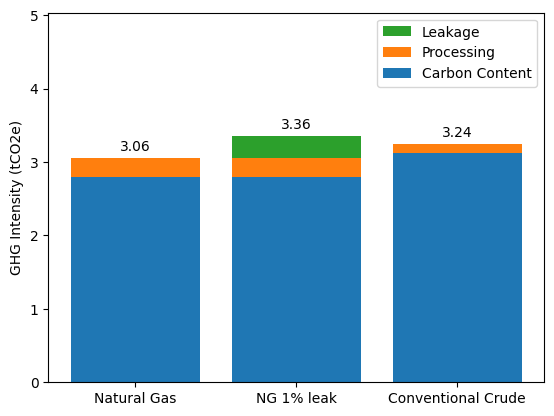

In [6]:
plot = Plot(nat_gas, leaky_nat_gas, crude)
plot.column_plot()

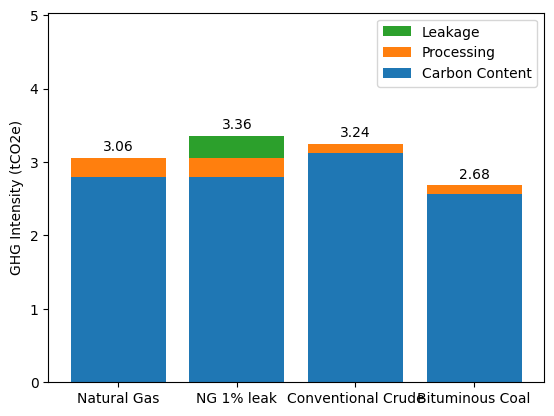

In [7]:
plot.add_column(coal)
plot.column_plot()